Epoch 1/200
1/1 [==============================] - 1s 620ms/step - loss: 6270608896.0000
Epoch 2/200
1/1 [==============================] - 0s 22ms/step - loss: 6270607360.0000
Epoch 3/200
1/1 [==============================] - 0s 42ms/step - loss: 6270607360.0000
Epoch 4/200
1/1 [==============================] - 0s 11ms/step - loss: 6270605824.0000
Epoch 5/200
1/1 [==============================] - 0s 19ms/step - loss: 6270604800.0000
Epoch 6/200
1/1 [==============================] - 0s 18ms/step - loss: 6270603776.0000
Epoch 7/200
1/1 [==============================] - 0s 24ms/step - loss: 6270602752.0000
Epoch 8/200
1/1 [==============================] - 0s 27ms/step - loss: 6270601728.0000
Epoch 9/200
1/1 [==============================] - 0s 26ms/step - loss: 6270600704.0000
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 6270599680.0000
Epoch 11/200
1/1 [==============================] - 0s 17ms/step - loss: 6270598656.0000
Epoch 12/200
1/1 [===========

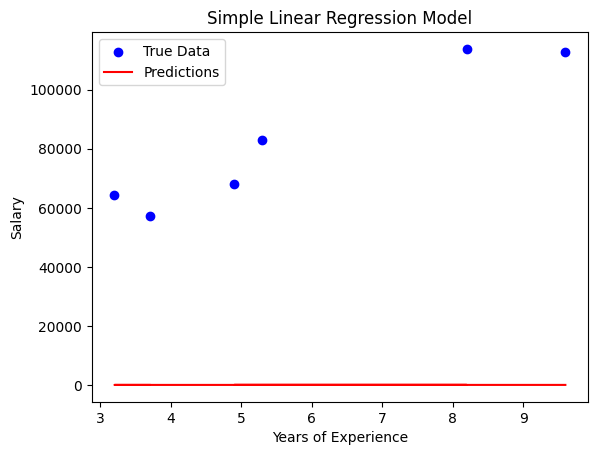

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import plot_model

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')

# Handling NaN values (if any)
dataset.dropna(inplace=True)  # Remove rows with NaN values

# Convert categorical variables to numeric using one-hot encoding
dataset = pd.get_dummies(dataset, drop_first=True)

# Separate features and target variable
X = dataset.iloc[:, :-1].values  # Features
y = dataset.iloc[:, -1].values   # Target (Salary)

# Ensure data types are correct
X = X.astype(np.float32)
y = y.astype(np.float32)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Adjust input shape based on features
    keras.layers.Dense(1)  # Output layer
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the data and the regression line (only possible if X has one feature)
if X_train.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue', label='True Data')
    plt.plot(X_test, y_pred, color='red', label='Predictions')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.title('Simple Linear Regression Model')
    plt.legend()
    plt.show()

# Visualizing the neural network structure using plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)


